# Importing Liabraries


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error


# Loading Dataset

In [21]:
df = pd.read_csv("Bengaluru_House_Data.csv")
print(df)

       area  bedrooms   price
0    1056.0         2   39.07
1    2600.0         5  120.00
2    1440.0         2   62.00
3    1521.0         3   95.00
4    1200.0         2   51.00
..      ...       ...     ...
294  1425.0         2   70.00
295  1450.0         3  100.00
296  1847.0         3  105.00
297  1100.0         2   45.00
298   525.0         1   26.00

[299 rows x 3 columns]


# Scaling The Factors

In [6]:
#The dataset should be Scaled before Training and dropping the target variable as Price


sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_X= sx.fit_transform(df.drop('price' , axis='columns'))
scaled_X

scaled_Y= sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_Y

array([[0.03747664],
       [0.14552737],
       [0.06809079],
       [0.11214953],
       [0.05340454],
       [0.03604806],
       [0.2576769 ],
       [0.78638184],
       [0.06975968],
       [0.47930574],
       [0.0787717 ],
       [0.37917223],
       [0.03604806],
       [0.03871829],
       [0.18291055],
       [0.08344459],
       [0.0493992 ],
       [0.06542056],
       [0.37249666],
       [0.0493992 ],
       [0.00534045],
       [0.1481976 ],
       [0.49265688],
       [0.12283044],
       [0.01902537],
       [0.06008011],
       [0.01615487],
       [0.09345794],
       [0.05042724],
       [0.04806409],
       [0.23364486],
       [0.03204272],
       [0.14953271],
       [0.06193591],
       [0.15220294],
       [0.03337784],
       [0.04606142],
       [0.15220294],
       [0.06024032],
       [0.04539386],
       [0.09345794],
       [0.03604806],
       [0.03604806],
       [0.0493992 ],
       [0.10786382],
       [0.25233645],
       [0.0293725 ],
       [0.111

# Batch Gradient Algorithm 

In [22]:
'''
Gradient Batch takes the training samples one by one so lets say it takes the first sample (1056,2) , formulation for the 
calcuation can be stated as : Price = w1*Area + w2*Bedroom + bias .

as the inital value of the variable w1,w2,bias is 1, so that it places the values in each context .
    Price = 1*1056 + 1*2 + 1 = 1059
    calculate the (Yi - Ypred) = (39,07,000 - 1059) = 3,905,941 
    
    so the value is the error one , similarly it calcultes all the erros and add it . 
    Error = err1 + err 2+.....+err n / total no of errors
    
    lastly it adds the partial Derivates w.r.t w1,w2,bias 
'''
def gradient_batch(X, y_true, epochs, learning_rate=0.0011): #defining the learning rate  
    
    ''' If the learning rate is high lets say is 2.0 so after the 250th iteration or at any 
    significant iteration the cost will get increase so that learning rate should be between the 0 and 1 '''
    
    number = X.shape[1]
    
    w = np.ones(shape=(number))  # Initializing weights to 1 at starting 
    b = 0
    
    total_sam = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        # Predictions
        y_predicted = np.dot(X, w) + b
        
        # Gradients calculation Formulas 
        w_grad = -(2 / total_sam) * np.dot(X.T, (y_true - y_predicted))
        b_grad = -(2 / total_sam) * np.sum(y_true - y_predicted)
        
        # Update weights and bias
        w -= learning_rate * w_grad
        b -= learning_rate * b_grad
        
        # Cost calculation
        cost = np.mean(np.square(y_true - y_predicted))
        
        # Store cost and epoch for plotting
        if i % 20 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w, b, cost, cost_list, epoch_list

# Example usage
w, b, cost, cost_list, epoch_list = gradient_batch(scaled_X, scaled_Y.reshape(-1,), 1000)
print(f"Weights: {w}")
print(f"Bias: {b}")
print(f"Final Cost: {cost}")


Weights: [0.90086202 0.88770941]
Bias: -0.25552825290452735
Final Cost: 0.03083080738651866


# Graph for Cost Function

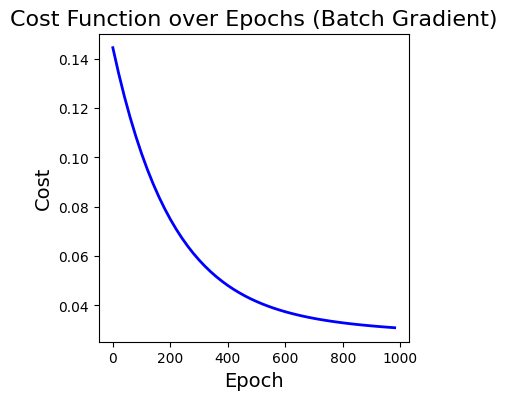

In [38]:
# Set figure size
plt.figure(figsize=(4, 4))

plt.plot(epoch_list, cost_list, color='blue', linestyle='-', linewidth=2)

#labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.title('Cost Function over Epochs (Batch Gradient)', fontsize=16)

# Show the plot
plt.show()

'''
This method shows a steady decrease in cost over epochs. It starts with a higher cost, which gradually
decreases but remains higher than the other methods throughout the epochs. This method takes the average 
of all gradients to update the weights, which can be slow but stable.
'''

# Predict the values 

In [29]:
def predict(area, bedrooms, w, b, sx, sy):
    # Scale the input data
    scaled_X = sx.transform([[area, bedrooms]])[0]
    
    # Predict the scaled price
    scaled_price = np.dot(scaled_X, w) + b
    
    # Inverse transform to get the actual price
    price = sy.inverse_transform([[scaled_price]])
    
    return price[0][0]

# Example usage
# Assume `w`, `b`, `sx`, and `sy` are already defined and fitted
# Example inputs
area = 1000  # Example area in square feet
bedrooms = 8# Example number of bedrooms

# Predict price
predicted_price = predict(area, bedrooms, w, b, sx, sy)
print(f"Predicted Price: {predicted_price}")


Predicted Price: 491.4574974690325


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Stochastic Gradient Descent 

In [30]:
def stochastic_gradient_batch(X, y_true, epochs, learning_rate=0.01):
    number = X.shape[1]

    # Initializing weights and bias
    w = np.ones(shape=(number,))
    b = 0

    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        # Randomly pick a sample
        random_index = np.random.randint(0, total_samples)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        # Predicted value
        y_predicted = np.dot(sample_x, w) + b
        
        # Compute gradients
        w_grad = -2 * sample_x * (sample_y - y_predicted)
        b_grad = -2 * (sample_y - y_predicted)

        # Update weights and bias
        w -= learning_rate * w_grad
        b -= learning_rate * b_grad

        # Calculate cost
        cost = np.square(sample_y - y_predicted)

        if i % 100 == 0:  # Record cost every 100 iterations
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_batch(scaled_X, scaled_Y.reshape(scaled_Y.shape[0]), 1000)
print(f"Weights: {w_sgd}")
print(f"Bias: {b_sgd}")
print(f"Final Cost: {cost_sgd}")


Weights: [0.70037898 0.54822914]
Bias: -0.18269786921195277
Final Cost: 0.000297926440643927


# Graph for Cost Function

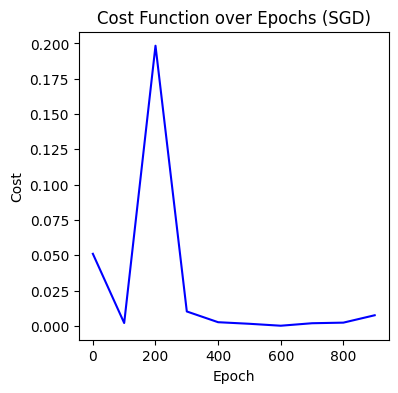

In [35]:
plt.figure(figsize=(4,4))
plt.plot(epoch_list_sgd, cost_list_sgd, 'b-')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function over Epochs (SGD)')
plt.show()

'''
This method shows a rapid initial decrease in cost but with significant fluctuations. 
The cost decreases quickly at first but varies due to the random selection of a single 
data point for each update. Over time, the cost reduces but is less stable compared to the 
other methods.
'''

# Mini-batch Gradient Descent 

In [36]:


def gradient_mini_batch(X, y_true, epochs, batch_size, learning_rate=0.01):
    number = X.shape[1]
    w = np.ones(shape=(number,))  # Initializing weights
    b = 0
    
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for epoch in range(epochs):
        # Shuffle the data
        indices = np.arange(total_samples)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y_true[indices]
        
        # Iterate over mini-batches
        for start in range(0, total_samples, batch_size):
            end = min(start + batch_size, total_samples)
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            
            # Predictions for the mini-batch
            y_predicted = np.dot(X_batch, w) + b
            
            # Compute gradients
            w_grad = -(2 / len(y_batch)) * X_batch.T.dot(y_batch - y_predicted)
            b_grad = -(2 / len(y_batch)) * np.sum(y_batch - y_predicted)
            
            # Update weights and bias
            w -= learning_rate * w_grad
            b -= learning_rate * b_grad
        
        # Compute cost for the entire dataset
        y_predicted_final = np.dot(X, w) + b
        cost = np.mean(np.square(y_true - y_predicted_final))
        
        if epoch % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(epoch)
    
    return w, b, cost, cost_list, epoch_list

# Example usage
w_mb, b_mb, cost_mb, cost_list_mb, epoch_list_mb = gradient_mini_batch(scaled_X, scaled_Y.reshape(scaled_Y.shape[0],), epochs=1000, batch_size=5)

print("Mini-Batch Weights:", w_mb)
print("Mini-Batch Bias:", b_mb)
print("Mini-Batch Final Cost:", cost_mb)

Mini-Batch Weights: [0.51656012 0.17169604]
Mini-Batch Bias: -0.03588356114580012
Mini-Batch Final Cost: 0.006220655697930686


# Graph for Cost Function

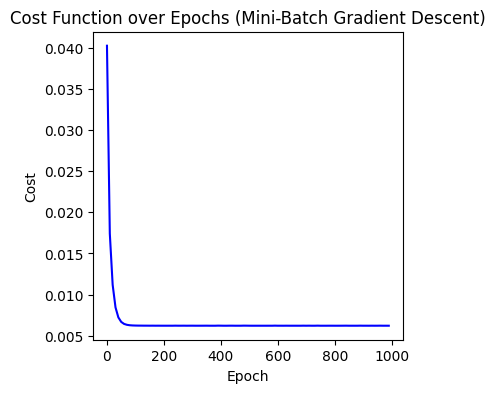

In [37]:

plt.figure(figsize=(4, 4))
plt.plot(epoch_list_mb, cost_list_mb, 'b-')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function over Epochs (Mini-Batch Gradient Descent)')
plt.show()

'''
This method also shows a rapid initial decrease in cost but with fewer fluctuations than Stochastic 
Gradient Descent. The cost reaches a lower value faster and stabilizes more quickly. This method 
balances the stability of Batch Gradient Descent and the speed of Stochastic Gradient Descent by 
updating weights using a small random subset of data.
'''

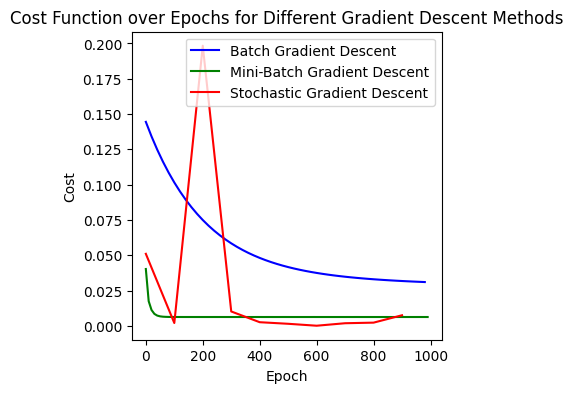

In [41]:


# Plot cost function over epochs for each method
plt.figure(figsize=(4,4))

# Batch Gradient Descent
plt.plot(epoch_list, cost_list, label='Batch Gradient Descent', color='blue')

# Mini-Batch Gradient Descent
plt.plot(epoch_list_mb, cost_list_mb, label='Mini-Batch Gradient Descent', color='green')

# Stochastic Gradient Descent
plt.plot(epoch_list_sgd, cost_list_sgd, label='Stochastic Gradient Descent', color='red')

plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function over Epochs for Different Gradient Descent Methods')
plt.legend()
plt.show()


# Calculating Metrics 

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Gradient Batch
w, b, _, _, _ = gradient_batch(scaled_X, scaled_Y.reshape(-1,), epochs=1000)
y_pred_batch = np.dot(scaled_X, w) + b
mse_batch, mae_batch, r2_batch = calculate_metrics(scaled_Y, y_pred_batch)
print(f"Gradient Batch - MSE: {mse_batch}, MAE: {mae_batch}, R2: {r2_batch}")

# Stochastic Gradient Descent
w_sgd, b_sgd, _, _, _ = stochastic_gradient_batch(scaled_X, scaled_Y.reshape(-1,), epochs=1000)
y_pred_sgd = np.dot(scaled_X, w_sgd) + b_sgd
mse_sgd, mae_sgd, r2_sgd = calculate_metrics(scaled_Y, y_pred_sgd)
print(f"Stochastic Gradient Descent - MSE: {mse_sgd}, MAE: {mae_sgd}, R2: {r2_sgd}")

# Mini-Batch Gradient Descent
w_mb, b_mb, _, _, _ = gradient_mini_batch(scaled_X, scaled_Y.reshape(-1,), epochs=1000, batch_size=5)
y_pred_mb = np.dot(scaled_X, w_mb) + b_mb
mse_mb, mae_mb, r2_mb = calculate_metrics(scaled_Y, y_pred_mb)
print(f"Mini-Batch Gradient Descent - MSE: {mse_mb}, MAE: {mae_mb}, R2: {r2_mb}")


Gradient Batch - MSE: 0.03082305268190736, MAE: 0.11717196061532824, R2: -1.0853323559518153
Stochastic Gradient Descent - MSE: 0.012631340325295762, MAE: 0.07549584351502758, R2: 0.14542719206914712
Mini-Batch Gradient Descent - MSE: 0.0062206676904994, MAE: 0.043427038902897445, R2: 0.5791409843634047


# Cost Variance and Cost SD

In [43]:
cost_variance = np.var(cost_list_sgd)
print(f"Cost Variance: {cost_variance}")

cost_std_dev = np.std(cost_list_sgd)
print(f"Cost Standard Deviation: {cost_std_dev}")

Cost Variance: 0.003446224116606266
Cost Standard Deviation: 0.058704549368905526


# Plotting Linear Regression Line on Mini-batch Algorithm

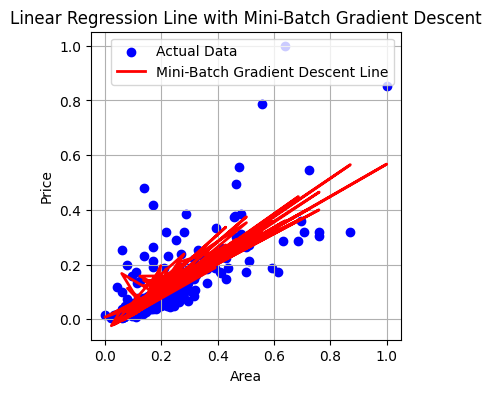

In [51]:
# Plotting the linear regression line
plt.figure(figsize=(4,4))

# Scatter plot of actual data
plt.scatter(scaled_X[:, 0], scaled_Y, color='blue', label='Actual Data')

# Generate predictions for plotting
y_pred_mb = predict(scaled_X, w_mb, b_mb)

# Plot the linear regression line
plt.plot(scaled_X[:, 0], y_pred_mb, color='red', linewidth=2, label='Mini-Batch Gradient Descent Line')

plt.xlabel('Area')  # Adjust if needed for your feature
plt.ylabel('Price')
plt.title('Linear Regression Line with Mini-Batch Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()